In [7]:
# Diabetes Case Study

In [ ]:
"""machine learning workflow
PLEDETF
1. Problem Definition
2. Load the packages
3. Exploratory Data analysis
4. Data Cleaning
5. Model Evaluation
6. Model Tuning
7. Finalize the model
"""

In [67]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# libraries for univariate and multicolinearity analysis
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
import phik

# preprocessing libraries
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

# metrics libraries
from sklearn.metrics import accuracy_score, RocCurveDisplay, confusion_matrix

# libraries for model selection and crossvalidation
from sklearn.model_selection import train_test_split, GridSearchCV


In [9]:
df = pd.read_csv('D:/_DataTrained_Data/diabetes.csv')

In [10]:
# check the shape of the data
df.shape

(768, 9)

In [15]:
# check the dataset
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
# check the statistics of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [ ]:
# observations


In [12]:
# check for missing values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [14]:
# check for data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


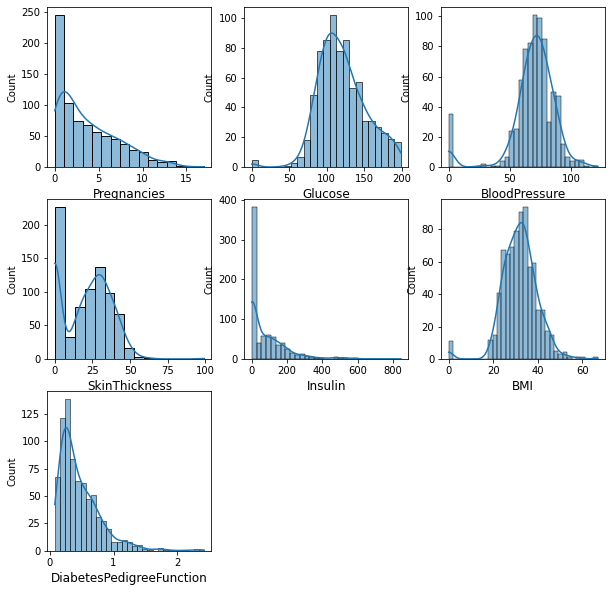

In [20]:
# checking the distribution of the data
plt.figure(figsize = (10,10))
plotnumber = 1

for col in df.columns[:-1]:
    if plotnumber < len(df.columns[:-1]):
        plt.subplot(3,3,plotnumber)
        sns.histplot(df[col], kde = True)
        plt.xlabel(col, fontsize = 12)
        plotnumber +=1
plt.show()

observation 1: the features Glucose, BloodPressure, SkinThickness, Insulin and BMI have 0 values which is incorrect hence we deal with that


observation 2: Pregrancies and DiabetesPedigreeFunction are both skewed

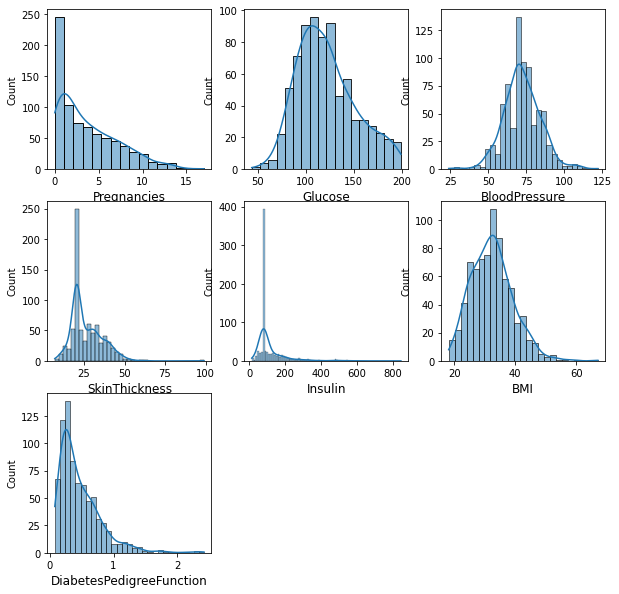

In [23]:
# dealing with observation 0 i.e. replacing the zero values with the mean of the data
columns_with_zero = ['Glucose',
                     'BloodPressure',
                     'SkinThickness',
                     'Insulin',
                     'BMI']
for col in columns_with_zero:
    df[col] = df[col].replace(0, df[col].mean())
    
# checking the distribution after removing the zeros from the requistite columns
plt.figure(figsize = (10, 10))
plotnumber = 1

for col in df.columns[:-1]:
    if plotnumber < len(df.columns[:-1]):
        plt.subplot(3,3,plotnumber)
        sns.histplot(df[col], kde = True)
        plt.xlabel(col, fontsize = 12)
        plotnumber+=1
plt.show()

the data looks more normally distribution

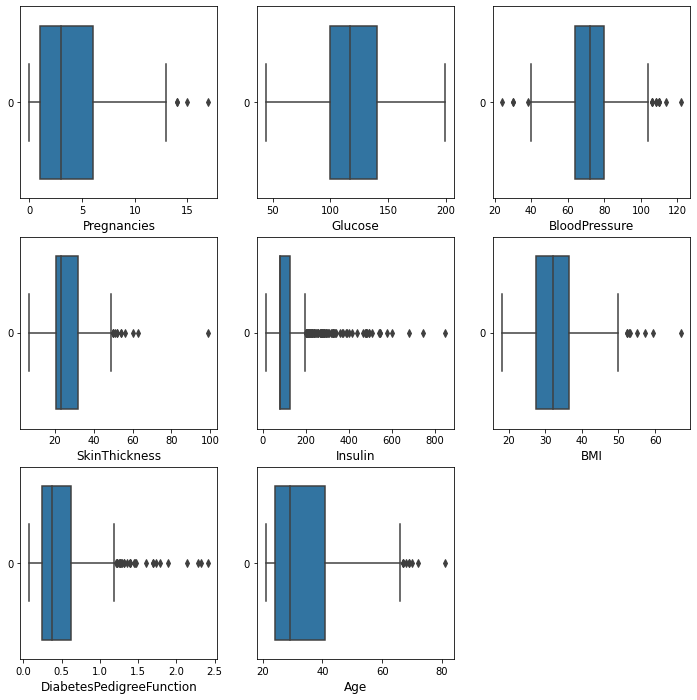

In [28]:
# checking for outliers
plt.figure(figsize = (12, 12))
plotnumber = 1

for col in df.columns[:-1]:
    if plotnumber<= len(df.columns[:-1]):
        plt.subplot(3,3,plotnumber)
        sns.boxplot(data = df[col], orient = 'h')
        plt.xlabel(col, fontsize = 12)
    plotnumber += 1
plt.show()

In [44]:
# removing the outliers using the IQR (inter quantile range)

q1 = df.iloc[:,:-1].quantile(0.25)
q3 = df.iloc[:,:-1].quantile(0.75)

In [45]:
IQR = q3-q1

In [46]:
# Columns with outliers higher than the IQR : All but Glucose
# Columns with outliers lower than the IQR : BloopPressure
# Columns without any outliers : Glucose

In [47]:
hi = q3 + 1.5 * IQR
lo = q1 - 1.5 * IQR
print(hi)
print(lo)

Pregnancies                  13.500000
Glucose                     201.000000
BloodPressure               104.000000
SkinThickness                49.195312
Insulin                     198.425781
BMI                          50.250000
DiabetesPedigreeFunction      1.200000
Age                          66.500000
dtype: float64
Pregnancies                 -6.500000
Glucose                     39.000000
BloodPressure               40.000000
SkinThickness                3.341146
Insulin                      8.623698
BMI                         13.850000
DiabetesPedigreeFunction    -0.330000
Age                         -1.500000
dtype: float64


In [59]:
columns_with_outliers = list(set(df.columns) - set(['Outcome']))

In [60]:
# removing the higher side outliers
for col in columns_with_outliers:
    index = np.where(df[col] > hi[col])
    df.drop(df.index[index], inplace = True)
    df.reset_index(drop=True, inplace = True)

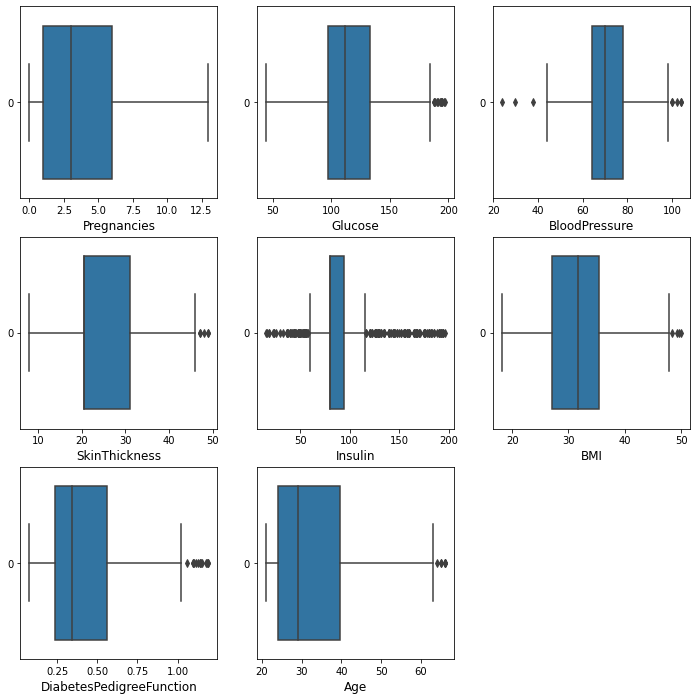

In [61]:
# checking for outliers
plt.figure(figsize = (12, 12))
plotnumber = 1

for col in df.columns[:-1]:
    if plotnumber<= len(df.columns[:-1]):
        plt.subplot(3,3,plotnumber)
        sns.boxplot(data = df[col], orient = 'h')
        plt.xlabel(col, fontsize = 12)
    plotnumber += 1
plt.show()

In [63]:
# checking the shape of the dataset to know how many data points are lost
df.shape

(622, 9)

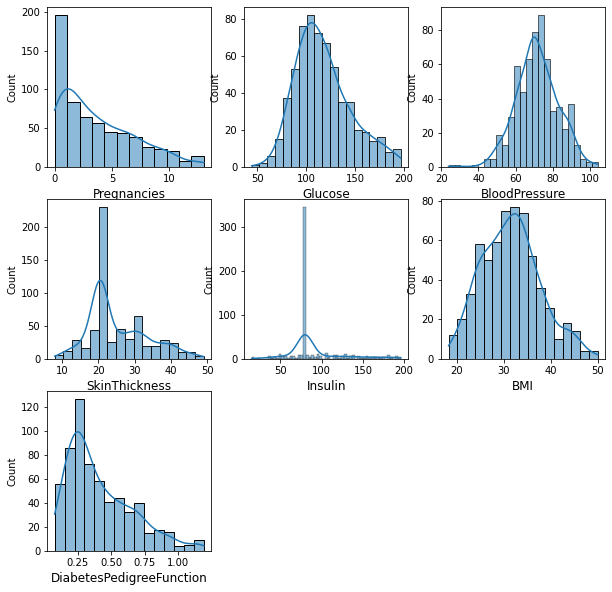

In [64]:
# checking the data distribution again
# checking the distribution after removing the zeros from the requistite columns
plt.figure(figsize = (10, 10))
plotnumber = 1

for col in df.columns[:-1]:
    if plotnumber < len(df.columns[:-1]):
        plt.subplot(3,3,plotnumber)
        sns.histplot(df[col], kde = True)
        plt.xlabel(col, fontsize = 12)
        plotnumber+=1
plt.show()

In [66]:
# now checking the distribution of the outcomes column
df['Outcome'].value_counts(normalize=True)

0    0.689711
1    0.310289
Name: Outcome, dtype: float64

In [68]:
# checking for the colinear relationship between the features and the dependent variable

pvalues = []
scores  = []

for col in df.columns[:-1]:
    pvalues.append(phik.significance.significance_from_array(df[col], df['Outcome'])[0])
    scores.append(phik.phik_from_array(df[col], df['Outcome']))

In [93]:
temp = pd.DataFrame({'features' : df.columns[:-1], 'Pvalues' : pvalues, 'Scores' : scores}).set_index('features').sort_values('Scores', ascending = False)

In [95]:
temp

,Pvalues,Scores
features,,
Glucose,1.804411e-11,0.562946
Age,5.048642e-07,0.420511
BMI,7.592215e-05,0.351664
DiabetesPedigreeFunction,5.144349e-09,0.346832
Pregnancies,1.867490e-06,0.327675
Insulin,5.290274e-05,0.285369
SkinThickness,8.548559e-03,0.217407
BloodPressure,8.587322e-02,0.130327


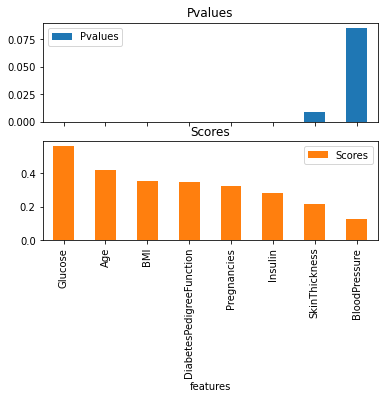

In [96]:
temp.plot(subplots = True, kind = 'bar')
plt.show()

BloopPressure though has the lowest score and higher significance it still is a relevant feature and we can't drop it